# WeatherPy
----

#### Note
* Instructions have been included for each segment. You do not have to follow them exactly, but they are included to help you think through the steps.

In [1]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import requests
import time
from scipy.stats import linregress

# Import API key
from api_keys import weather_api_key

# Incorporated citipy to determine city based on latitude and longitude
from citipy import citipy

# Output File (CSV)
output_data_file = "output_data/cities.csv"

# Range of latitudes and longitudes
lat_range = (-90, 90)
lng_range = (-180, 180)

## Generate Cities List

In [2]:
# List for holding lat_lngs and cities
lat_lngs = []
cities = []

# Create a set of random lat and lng combinations
lats = np.random.uniform(low=-90.000, high=90.000, size=1500)
lngs = np.random.uniform(low=-180.000, high=180.000, size=1500)
lat_lngs = zip(lats, lngs)

# Identify nearest city for each lat, lng combination
for lat_lng in lat_lngs:
    city = citipy.nearest_city(lat_lng[0], lat_lng[1]).city_name
    
    # If the city is unique, then add it to a our cities list
    if city not in cities:
        cities.append(city)

# Print the city count to confirm sufficient count
len(cities)

604

In [3]:
cities

['vaini',
 'hambantota',
 'bredasdorp',
 'jamestown',
 'busselton',
 'norsup',
 'hithadhoo',
 'taolanaro',
 'rikitea',
 'port hardy',
 'aksaray',
 'maraa',
 'qaanaaq',
 'cherskiy',
 'punta arenas',
 'esperance',
 'batemans bay',
 'kloulklubed',
 'bluff',
 'east london',
 'kapaa',
 'mataura',
 'belushya guba',
 'daman',
 'pevek',
 'guozhen',
 'fairbanks',
 'yellowknife',
 'karakendzha',
 'wawa',
 'hilo',
 'bechem',
 'canutama',
 'puerto ayora',
 'ushuaia',
 'illoqqortoormiut',
 'albany',
 'kizu',
 'cape town',
 'adrar',
 'old town',
 'tiksi',
 'phalombe',
 'ulaanbaatar',
 'attawapiskat',
 'steamboat springs',
 'shelburne',
 'rio gallegos',
 'escuinapa',
 'chaman',
 'kharagpur',
 'provideniya',
 'kibala',
 'victoria',
 'kalmar',
 'salzwedel',
 'tshikapa',
 'carnarvon',
 'tubmanburg',
 'guilin',
 'lebu',
 'lumeje',
 'tuktoyaktuk',
 'uyskoye',
 'bubaque',
 'karpogory',
 'saldanha',
 'kavieng',
 'kruisfontein',
 'karratha',
 'wurzen',
 'fort nelson',
 'tarata',
 'cabo san lucas',
 'saint ge

### Perform API Calls
* Perform a weather check on each city using a series of successive API calls.
* Include a print log of each city as it'sbeing processed (with the city number and city name).


In [4]:
# This is for one city to test.
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"

# Build partial query URL
query_url = f"{url}appid={weather_api_key}&units={units}&q="
city1 = "chuy"
query_url1 = query_url+city1
response = requests.get(query_url1).json()
#query_url1
response

{'coord': {'lon': -53.46, 'lat': -33.7},
 'weather': [{'id': 802,
   'main': 'Clouds',
   'description': 'scattered clouds',
   'icon': '03d'}],
 'base': 'model',
 'main': {'temp': 28.74,
  'feels_like': 29.28,
  'temp_min': 28.74,
  'temp_max': 28.74,
  'pressure': 1010,
  'humidity': 61,
  'sea_level': 1010,
  'grnd_level': 1009},
 'wind': {'speed': 4.82, 'deg': 98},
 'clouds': {'all': 42},
 'dt': 1579554787,
 'sys': {'country': 'UY', 'sunrise': 1579509798, 'sunset': 1579560345},
 'timezone': -10800,
 'id': 3443061,
 'name': 'Chui',
 'cod': 200}

In [5]:
url = "http://api.openweathermap.org/data/2.5/weather?"
units = "metric"
query_url = f"{url}appid={weather_api_key}&units={units}&q="

lat=[]
lon=[]
temp=[]
humidity=[]
windspeed=[]
clouds=[]
country=[]
citynames=[]


for index,city in enumerate(cities[:600]):
    try:
        response = requests.get(query_url + city).json()
        lat.append(response['coord']['lat'])
        lon.append(response['coord']['lon'])
        temp.append(response['main']['temp_max'])
        humidity.append(response['main']['humidity'])
        windspeed.append(response['wind']['speed'])
        clouds.append(response['clouds']['all'])
        country.append(response['sys']['country'])
        citynames.append(city)
        print("city number is " +str(index)+ " City is: "+city)
    except:
        print("City not found")
    


city number is 0 City is: vaini
city number is 1 City is: hambantota
city number is 2 City is: bredasdorp
city number is 3 City is: jamestown
city number is 4 City is: busselton
city number is 5 City is: norsup
city number is 6 City is: hithadhoo
City not found
city number is 8 City is: rikitea
city number is 9 City is: port hardy
city number is 10 City is: aksaray
city number is 11 City is: maraa
city number is 12 City is: qaanaaq
city number is 13 City is: cherskiy
city number is 14 City is: punta arenas
city number is 15 City is: esperance
city number is 16 City is: batemans bay
city number is 17 City is: kloulklubed
city number is 18 City is: bluff
city number is 19 City is: east london
city number is 20 City is: kapaa
city number is 21 City is: mataura
City not found
city number is 23 City is: daman
city number is 24 City is: pevek
city number is 25 City is: guozhen
city number is 26 City is: fairbanks
city number is 27 City is: yellowknife
City not found
city number is 29 City is

city number is 232 City is: port said
city number is 233 City is: thompson
city number is 234 City is: zhizdra
City not found
city number is 236 City is: gat
city number is 237 City is: lundazi
city number is 238 City is: mountain home
city number is 239 City is: mehamn
city number is 240 City is: praia
city number is 241 City is: muriwai beach
city number is 242 City is: ilabaya
city number is 243 City is: lunenburg
city number is 244 City is: marabba
city number is 245 City is: halifax
city number is 246 City is: fleetwood
city number is 247 City is: shu
city number is 248 City is: mareeba
city number is 249 City is: lagoa
city number is 250 City is: challans
city number is 251 City is: shenjiamen
city number is 252 City is: veraval
city number is 253 City is: saskylakh
city number is 254 City is: klaksvik
city number is 255 City is: severo-kurilsk
city number is 256 City is: nome
city number is 257 City is: nikolskoye
city number is 258 City is: berck
city number is 259 City is: kiu

City not found
city number is 467 City is: kotido
city number is 468 City is: marienburg
city number is 469 City is: sayat
city number is 470 City is: sao filipe
city number is 471 City is: mingyue
city number is 472 City is: libreville
city number is 473 City is: bejar
city number is 474 City is: thanh hoa
city number is 475 City is: nizwa
City not found
city number is 477 City is: goderich
city number is 478 City is: tehachapi
city number is 479 City is: miraflores
city number is 480 City is: isangel
city number is 481 City is: ulladulla
city number is 482 City is: sobolevo
city number is 483 City is: ancud
city number is 484 City is: wonthaggi
city number is 485 City is: bardiyah
city number is 486 City is: los llanos de aridane
city number is 487 City is: bonavista
city number is 488 City is: champerico
city number is 489 City is: acarau
city number is 490 City is: coquimbo
city number is 491 City is: shache
city number is 492 City is: oistins
city number is 493 City is: cabot
city

### Convert Raw Data to DataFrame
* Export the city data into a .csv.
* Display the DataFrame

In [6]:
weather_df=pd.DataFrame({"City":citynames,"Cloudiness":clouds,"Country":country,
                         "Lat":lat,"Lng":lon,"Humidity":humidity,
                        "Max Temp":temp,"Wind Speed":windspeed})

weather_df

,City,Cloudiness,Country,Lat,Lng,Humidity,Max Temp,Wind Speed
0,vaini,20,TO,-21.20,-175.20,69,27.00,5.10
1,hambantota,82,LK,6.12,81.12,83,26.66,9.88
2,bredasdorp,100,ZA,-34.53,20.04,82,19.00,6.20
3,jamestown,1,US,42.10,-79.24,49,-5.00,3.10
4,busselton,81,AU,-33.65,115.33,51,17.78,6.49
...,...,...,...,...,...,...,...,...
543,lasa,0,IT,46.62,10.70,62,-3.89,0.50
544,huarmey,100,PE,-10.07,-78.15,57,25.97,3.43
545,dunmore town,0,BS,25.50,-76.65,75,23.73,5.26
546,svetlogorsk,100,BY,52.63,29.73,84,0.03,6.72


In [7]:
weather_df.to_csv("weather.csv")

### Plotting the Data
* Use proper labeling of the plots using plot titles (including date of analysis) and axes labels.
* Save the plotted figures as .pngs.

#### Latitude vs. Temperature Plot

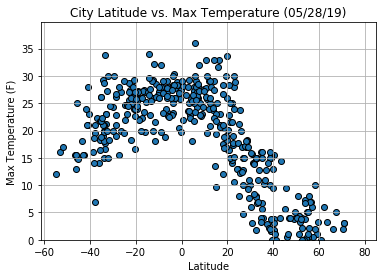

In [13]:
x_lat = weather_df['Lat']
y_temp = weather_df['Max Temp']
plt.scatter(x_lat,y_temp,marker = 'o',edgecolors = 'black')
plt.title("City Latitude vs. Max Temperature (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Max Temperature (F)")
plt.ylim(0)
plt.grid()

#### Latitude vs. Humidity Plot

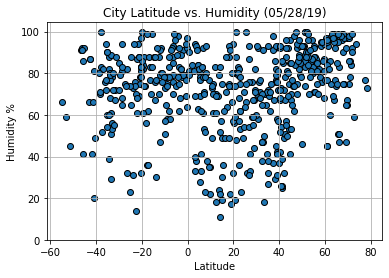

In [16]:
x_lat = weather_df['Lat']
y_humidity = weather_df['Humidity']
plt.scatter(x_lat,y_humidity,marker = 'o',edgecolors = 'black')
plt.title("City Latitude vs. Humidity (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Humidity %")
plt.ylim(0)
plt.grid()

#### Latitude vs. Cloudiness Plot

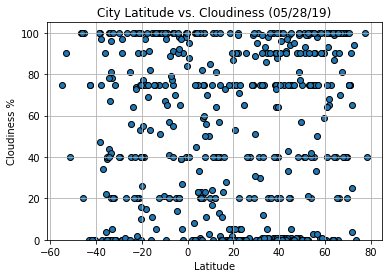

In [15]:
x_lat = weather_df['Lat']
y_clouds = weather_df['Cloudiness']
plt.scatter(x_lat,y_clouds,marker = 'o',edgecolors = 'black')
plt.title("City Latitude vs. Cloudiness (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Cloudiness %")
plt.ylim(0)
plt.grid()

#### Latitude vs. Wind Speed Plot

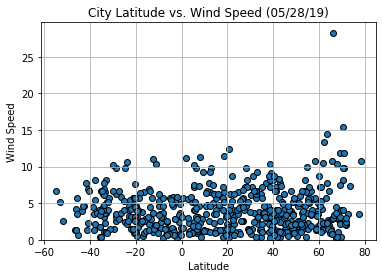

In [17]:
x_lat = weather_df['Lat']
y_windspeed = weather_df['Wind Speed']
plt.scatter(x_lat,y_windspeed,marker = 'o',edgecolors = 'black')
plt.title("City Latitude vs. Wind Speed (05/28/19)")
plt.xlabel("Latitude")
plt.ylabel("Wind Speed")
plt.ylim(0)
plt.grid()

## Linear Regression

In [10]:
# OPTIONAL: Create a function to create Linear Regression plots


In [11]:
# Create Northern and Southern Hemisphere DataFrames


####  Northern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Southern Hemisphere - Max Temp vs. Latitude Linear Regression

####  Northern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Humidity (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Southern Hemisphere - Cloudiness (%) vs. Latitude Linear Regression

####  Northern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression

####  Southern Hemisphere - Wind Speed (mph) vs. Latitude Linear Regression